# fvGP comprehensive test

## (0) Setup

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from fvgp.gp import GP
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


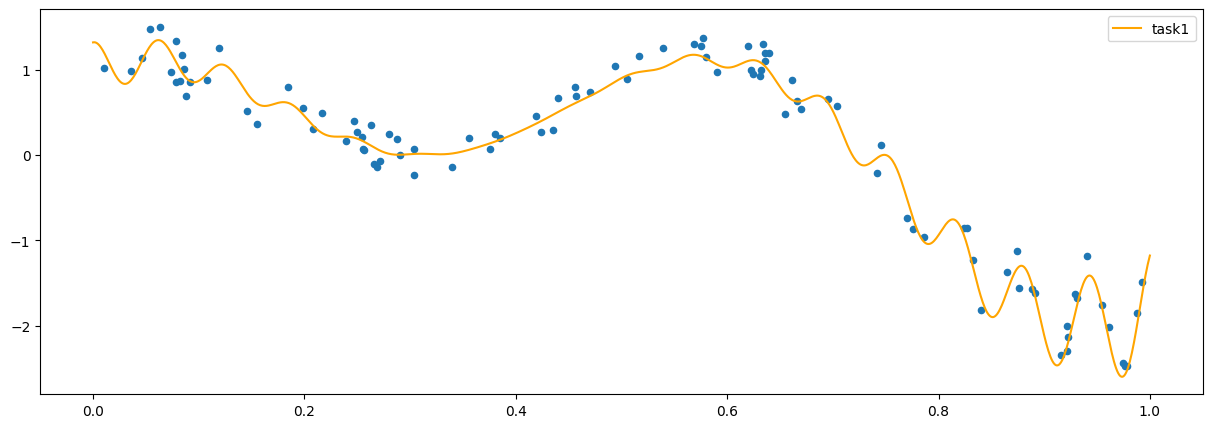

In [114]:
x = np.linspace(0,1,1000)
def f1(x):
    return np.sin(5. * x) + np.cos(10. * x) + (2.* (x-0.4)**2) * np.cos(100. * x)

x_data = np.random.rand(100)
y_data = f1(x_data) + (np.random.rand(len(x_data))-0.5) * 0.5
plt.figure(figsize = (15,5))
plt.plot(x,f1(x), color = 'orange', label = 'task1')
plt.legend()
plt.scatter(x_data,y_data, s = 20)

In [115]:
#stationary
def skernel(x1,x2,hps,obj):
    d = obj._get_distance_matrix(x1,x2)
    return hps[0] * obj.matern_kernel_diff1(d,hps[1])

def noise(x, hps,obj):
    print("noise evaluated")
    return np.diag(np.zeros((len(x))) + hps[2])


def meanf(x, hps, obj):
    #print(np.sin(hps[3] * x))
    return np.sin(hps[3] * x)[:,0]
#plt.figure(figsize = (15,5))
#plt.plot(x,meanf(x, np.array([1.,1.,5.0]), None), color = 'orange', label = 'task1')

noise evaluated
noise evaluated
Data Plot:


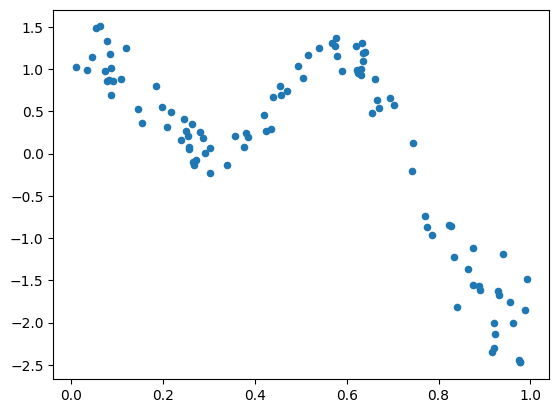

noise evaluated
noise evaluated
Global Training
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise ev

noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise ev

noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise evaluated
noise ev

In [ ]:
my_gp1 = GP(1, x_data,y_data,np.ones((4)),
            noise_variances=None, 
            compute_device='cpu', 
            gp_kernel_function=skernel, 
            gp_kernel_function_grad=None, 
            gp_mean_function=meanf, 
            gp_mean_function_grad=None,
            gp_noise_function=noise,
            normalize_y=False,
            sparse_mode=False,
            store_inv=True, 
            ram_economy=False, 
            args=None,
            )


print("Data Plot:")
plt.scatter(my_gp1.x_data,my_gp1.y_data, s = 20)
plt.show()
x_pred = np.linspace(0,1,1000)


hps_bounds = np.array([[0.001,10.],[0.001,10.],[0.001,10.],[0.001,10.]])

my_gp1.update_gp_data(x_data, y_data)
print("Global Training")
my_gp1.train(hps_bounds, method='global')
print("hps: ", my_gp1.get_hyperparameters())
print("Local Training")
my_gp1.train(hps_bounds, method='local')
print(my_gp1.get_hyperparameters())
print("MCMC Training")
my_gp1.train(hps_bounds, method='mcmc', max_iter=1000)
print(my_gp1.get_hyperparameters())
#my_gp1.train(np.array([[0.001,10.],[0.001,10.]]), method='hgdl')


In [ ]:
my_gp1.test_log_likelihood_gradient(my_gp1.hyperparameters)

In [ ]:
my_gp1.train(hps_bounds, method='hgdl')

In [ ]:
opt_obj = my_gp1.train_async(hps_bounds)

In [ ]:
my_gp1.update_hyperparameters(opt_obj)
for entry in opt_obj.optima.list:
    print(entry)
    print("")

#my_gp1.entropy(my_gp1.prior_covariance)

error:  0.626272663611578


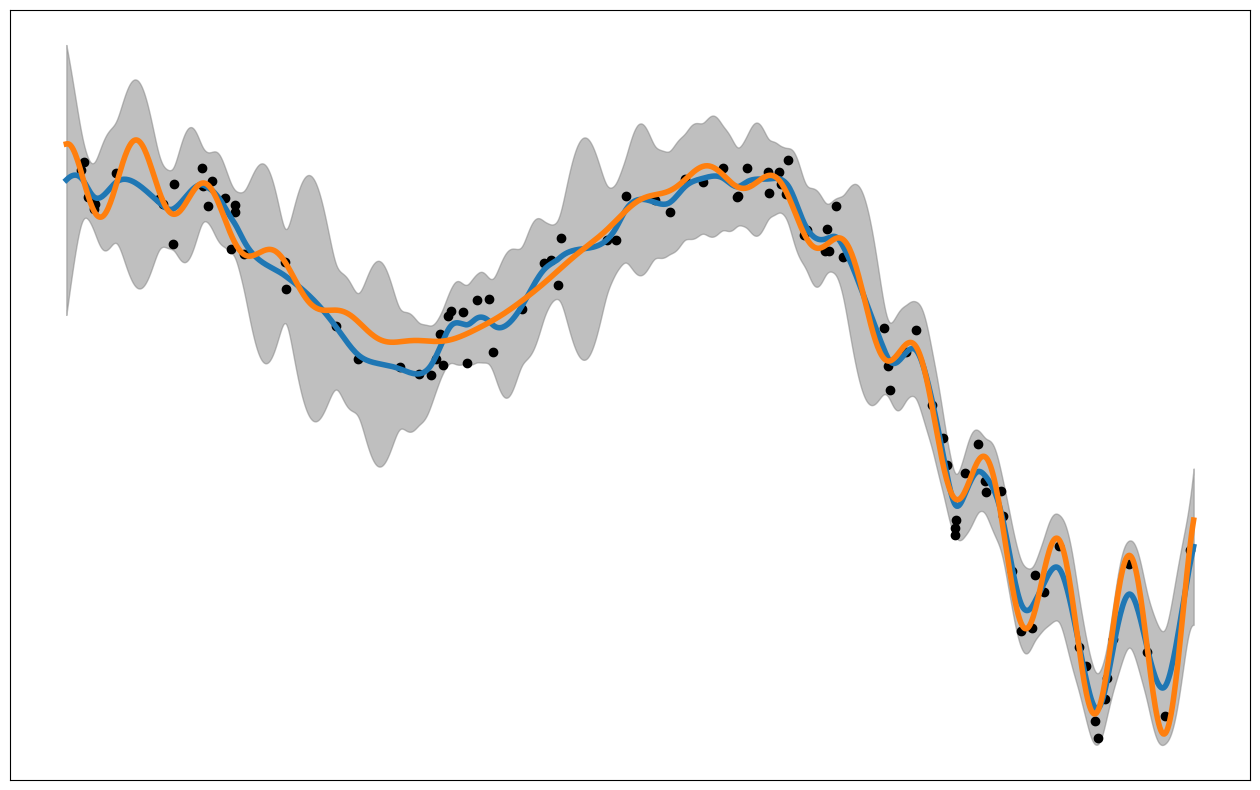

In [44]:
#let's make a prediction
mean1 = my_gp1.posterior_mean(x_pred.reshape(-1,1))["f(x)"]
var1 =  my_gp1.posterior_covariance(x_pred.reshape(-1,1))["v(x)"]

plt.figure(figsize = (16,10))
plt.plot(x,mean1, label = "posterior mean", linewidth = 4)
plt.plot(x,f1(x), label = "latent function", linewidth = 4)
plt.fill_between(x, mean1 - 3. * np.sqrt(var1), mean1 + 3. * np.sqrt(var1), alpha = 0.5, color = "grey", label = "var")
#plt.plot(x, (f(x)-mean1)**2)
plt.scatter(x_data,y_data, color = 'black')
#plt.legend(fontsize = 20)
plt.xticks([])
plt.yticks([])
print("error: ", np.sum(f1(x)-mean1)**2 / len(mean1))

In [ ]:
my_gp1.stop_training(opt_obj)
my_gp1.kill_training(opt_obj)

## Multi Task

/home/marcus/Coding/fvGP/fvgp/fvgp.py:234: UserWarning: No noise function or measurement noise provided. Noise variances will be set to 1% of mean(y_data).
  super().__init__(


Data Plot:


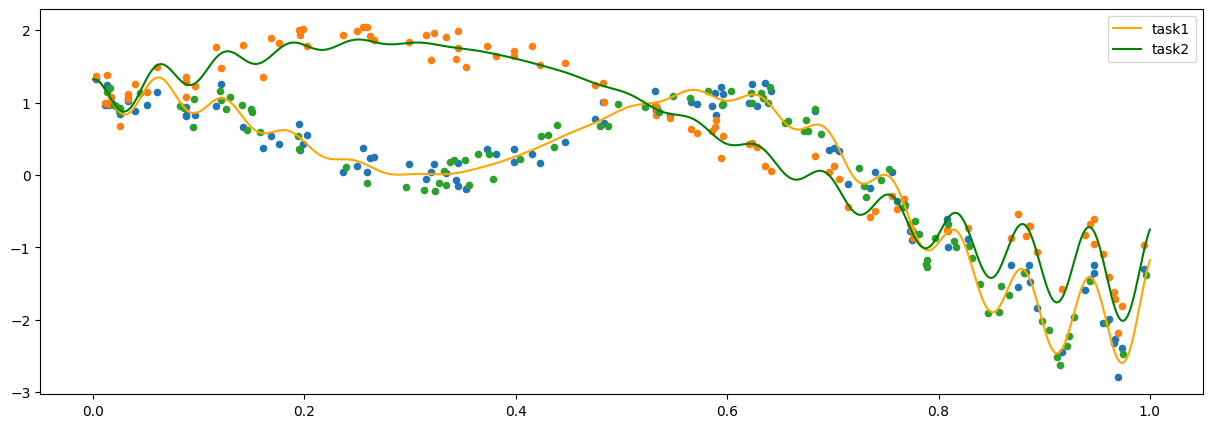

Global Training


In [112]:
from fvgp.fvgp import fvGP

x = np.linspace(0,1,1000)
def f1(x):
    return np.sin(5. * x) + np.cos(10. * x) + (2.* (x-0.4)**2) * np.cos(100. * x)

def f2(x):
    return np.sin(5. * x) + np.cos(2. * x) + (2.* (x-0.4)**2) * np.cos(100. * x)

x_data = np.random.rand(100)
y_data = np.empty((len(x_data),2))
y_data[:,0] = f1(x_data) + (np.random.rand(len(x_data))-0.5) * 0.5
y_data[:,1] = f2(x_data) + (np.random.rand(len(x_data))-0.5) * 0.5
plt.figure(figsize = (15,5))
plt.plot(x,f1(x), color = 'orange', label = 'task1')
plt.plot(x,f2(x), color = 'green',  label = 'task2')
plt.legend()
plt.scatter(x_data,y_data[:,0], s = 20)
plt.scatter(x_data,y_data[:,1], s = 20)

my_gp2 = fvGP(1, 1, 2, x_data,y_data,np.ones((4)),
            noise_variances=None, 
            compute_device='cpu', 
            gp_kernel_function=None, 
            gp_kernel_function_grad=None, 
            gp_mean_function=meanf, 
            gp_mean_function_grad=None,
            gp_noise_function=None,
            normalize_y=False,
            sparse_mode=False,
            store_inv=True, 
            ram_economy=False, 
            args=None,
            )


print("Data Plot:")
plt.scatter(my_gp1.x_data,my_gp1.y_data, s = 20)
plt.show()
x_pred = np.linspace(0,1,1000)


hps_bounds = np.array([[0.001,10.],[0.001,10.],[0.001,10.],[0.001,10.]])

#my_gp1.update_gp_data(x_data, y_data)
print("Global Training")
my_gp2.train(my_gp2.hps_bounds, method='global')
#print("hps: ", my_gp1.get_hyperparameters())
#print("Local Training")
#my_gp1.train(hps_bounds, method='local')
#print(my_gp1.get_hyperparameters())
#print("MCMC Training")
#my_gp1.train(hps_bounds, method='mcmc', max_iter=1000)
#print(my_gp1.get_hyperparameters())

In [67]:
my_gp2.input_space_dim


2

[autoreload of fvgp.fvgp failed: Traceback (most recent call last):
  File "/home/marcus/VirtualEnvironments/fvgp_dev/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/home/marcus/VirtualEnvironments/fvgp_dev/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
  File "/usr/lib/python3.10/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 879, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1017, in get_code
  File "<frozen importlib._bootstrap_external>", line 947, in source_to_code
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/home/marcus/Coding/fvGP/fvgp/fvgp.py", line 333
    return hps[183] * np.exp(-d**2/hps[184])
    ^^^^^^^^^^^^^

error:  0.626272663611578


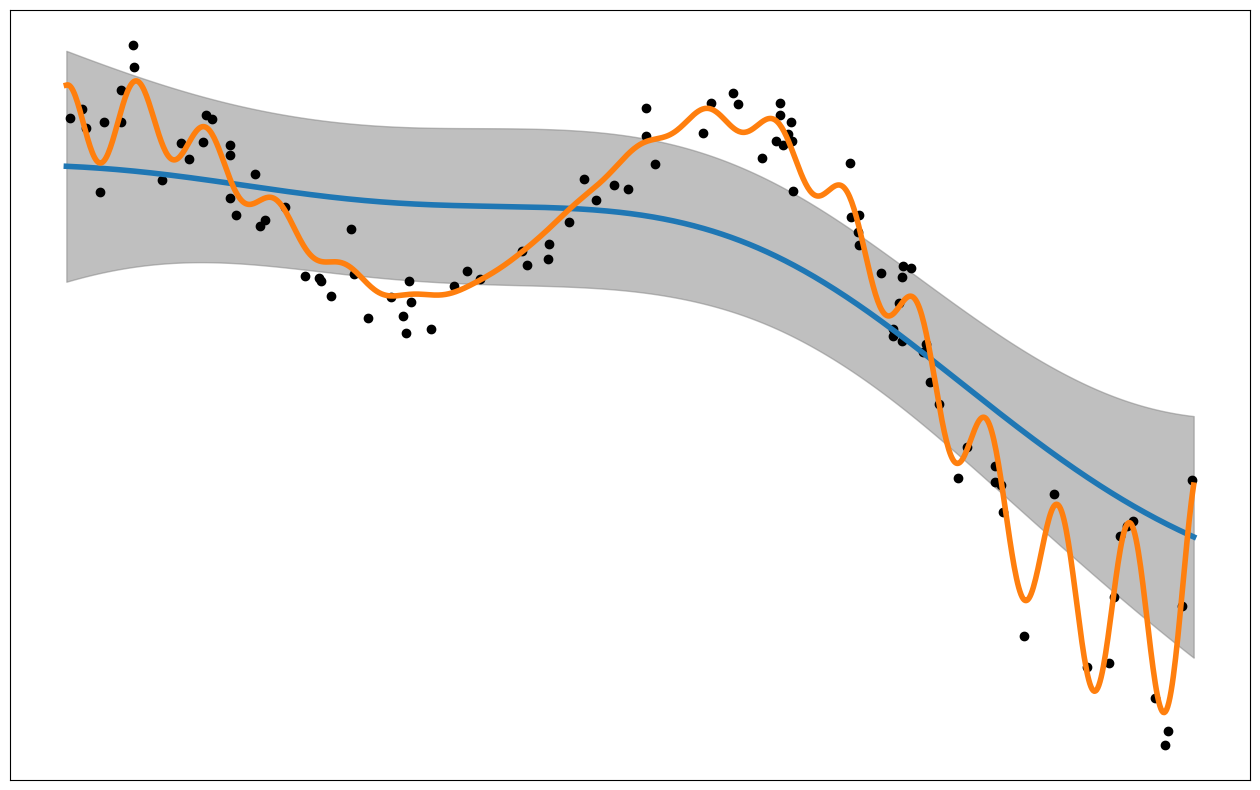

In [73]:
#let's make a prediction
res = my_gp2.posterior_mean(x_pred.reshape(-1,1), x_out=np.array([[0],[1]]), hyperparameters=np.array([1,1,1,1]))
mean2 = res["f(x)"][0:1000]
var2 =  my_gp2.posterior_covariance(x_pred.reshape(-1,1), x_out=np.array([[0],[1]]))["v(x)"][0:1000]

plt.figure(figsize = (16,10))
plt.plot(x,mean2, label = "posterior mean", linewidth = 4)
plt.plot(x,f1(x), label = "latent function", linewidth = 4)
plt.fill_between(x, mean2 - 3. * np.sqrt(var2), mean2 + 3. * np.sqrt(var2), alpha = 0.5, color = "grey", label = "var")
#plt.plot(x, (f(x)-mean1)**2)
plt.scatter(x_data,y_data[:,0], color = 'black')
#plt.legend(fontsize = 20)
plt.xticks([])
plt.yticks([])
print("error: ", np.sum(f1(x)-mean1)**2 / len(mean1))

# Performance Tests